Use the new cice grid scripts and compare it to the old results

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
_script_path = '/g/data/tm70/as2285/om3-scripts/grid_generation/Gen_CICE_grid.py'

In [3]:
_data_dir = '/g/data/ik11/inputs/access-om2/input_20200530/'

In [4]:
cd /g/data/tm70/as2285/om3-scripts/grid_generation

/g/data/tm70/as2285/om3-scripts/grid_generation


In [5]:
res = ['1deg', '025deg', '01deg']

In [30]:
! python3 {_script_path} {_data_dir}/mom_{res[0]}/ocean_hgrid.nc grid_{res[0]}.nc

0.3.0
NetCDF file created successfully.


In [31]:
! python3 {_script_path} {_data_dir}/mom_{res[1]}/ocean_hgrid.nc grid_{res[1]}.nc

0.3.0
NetCDF file created successfully.


In [32]:
! python3 {_script_path} {_data_dir}/mom_{res[2]}/ocean_hgrid.nc grid_{res[2]}.nc

0.3.0
NetCDF file created successfully.


Let set our tolerance to 2e-6 as precision of float32 is 1e.6:

In [33]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

Plot all the differences in all vars and resolutions:

1deg
new vars not in old?
set()
missing vars in new?
{'hun', 'hue', 'lonu_bonds', 'latt_bonds', 'latu_bonds', 'lont_bonds'}
025deg
new vars not in old?
set()
missing vars in new?
set()
01deg
new vars not in old?
set()
missing vars in new?
{'clon_t', 'clon_u', 'clat_u', 'clat_t'}


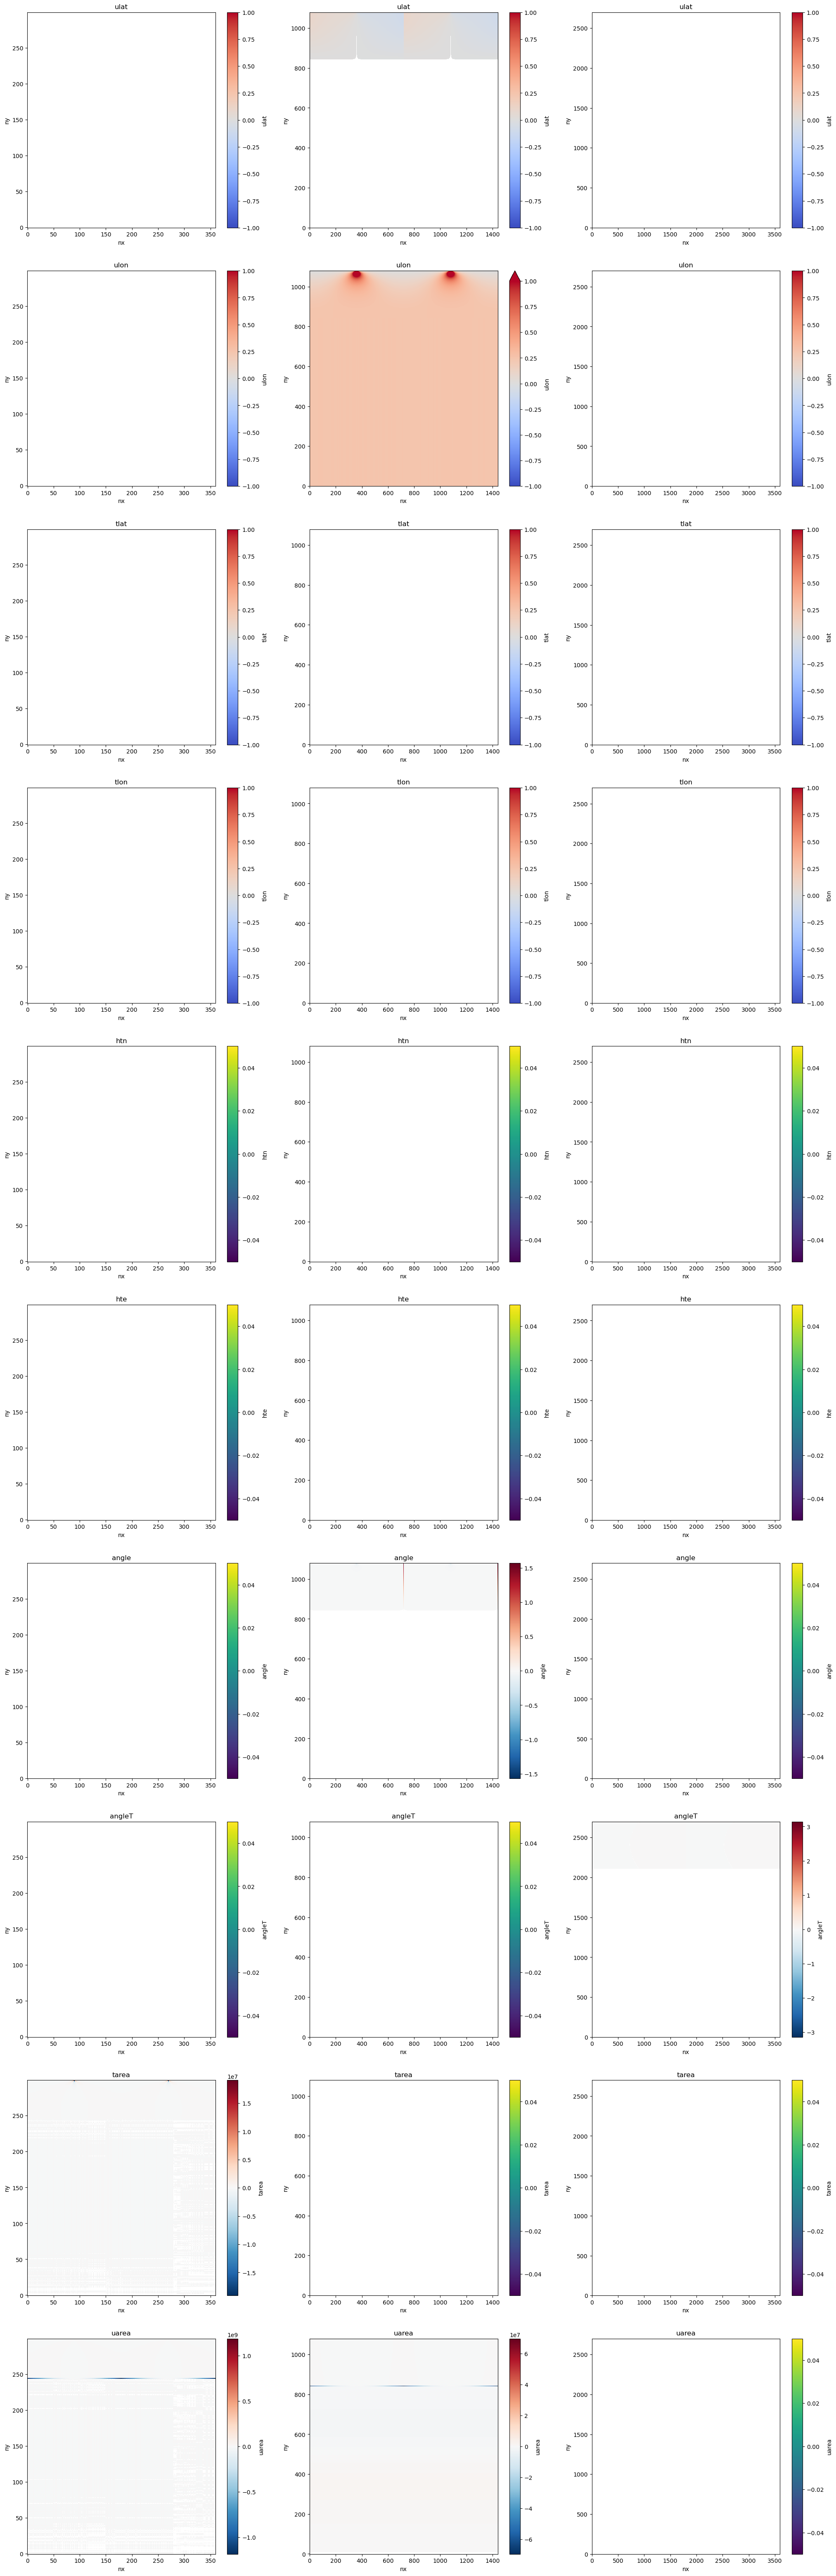

In [8]:
plt.figure(figsize=(25,80))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_{iRes}/grid.nc')
    new_cice_grid = xr.open_dataset(f'grid_{iRes}.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.data_vars).difference(old_cice_grid.data_vars))
    print("missing vars in new?")
    print(set(old_cice_grid.data_vars).difference(new_cice_grid.data_vars))
    
    for j,jVar in enumerate(new_cice_grid.data_vars):
        
        plt.subplot(
            len(new_cice_grid.data_vars),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)
        
        if (jVar in (['ulat','ulon','tlat','tlon'])):
            anom = np.rad2deg(anom)        
            anom.plot(vmin=-1, vmax=1, cmap='coolwarm')
        else:
            anom.plot()

        
        plt.title(jVar)

More detail on 0.1 degree ulat/ulon and angle

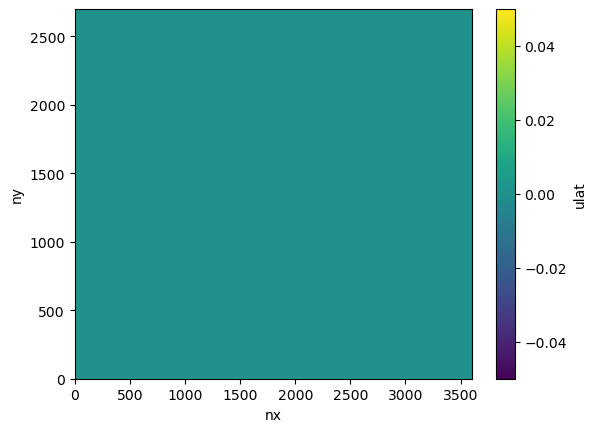

In [35]:
np.rad2deg((new_cice_grid-old_cice_grid).ulat).plot()

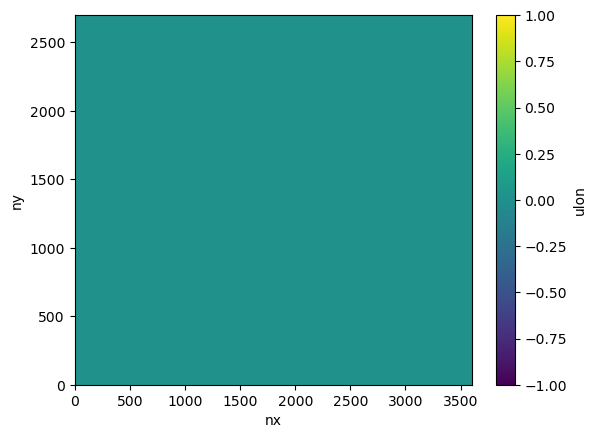

In [36]:
np.rad2deg((new_cice_grid-old_cice_grid).ulon).plot(vmin=-1, vmax=1)

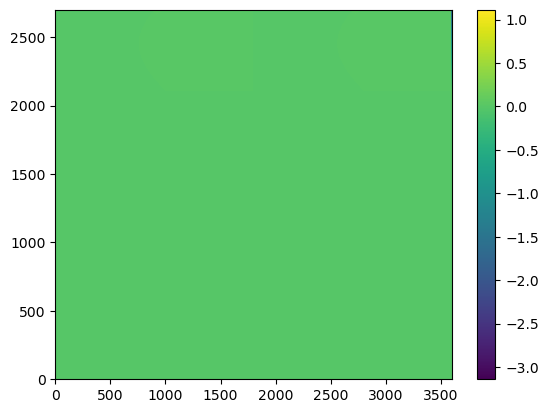

In [12]:
plt.pcolor(new_cice_grid.angleT.values-old_cice_grid.angleT.values)
plt.colorbar()

what is going on with 0.25 deg angle?

In [6]:
old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_025deg/grid.nc')
new_cice_grid = xr.open_dataset(f'grid_025deg.nc')


0.3.0


Looks to be the same problem as ulat / ulon, x is offset by 1:

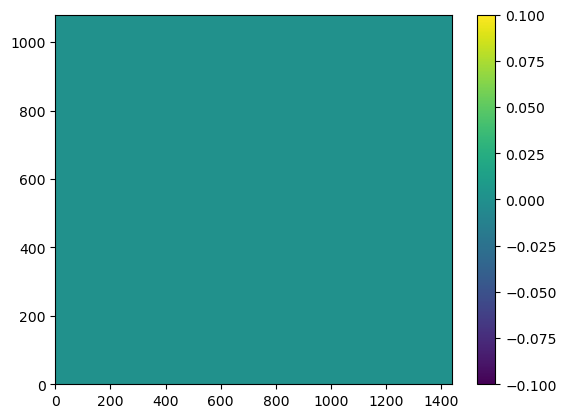

In [7]:
plt.pcolor(new_cice_grid.angle[:,:-1].values-old_cice_grid.angle[:,1:].values)
plt.colorbar()